In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
#download mnist database
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


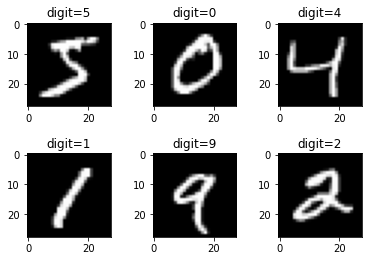

In [4]:
#show samples
rows=2
cols=3
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#show samples as images
for i in range(rows*cols):
    fig=plt.subplot(rows,cols,i+1)
    plt.imshow(x_train[i],cmap=plt.get_cmap("gray"))
    fig.title.set_text("digit="+str(y_train[i]))

(28, 28)


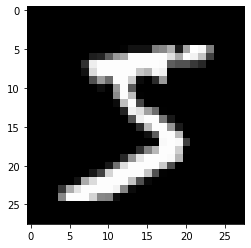

In [6]:
#show a sample as a matrix
print(x_train[0].shape)
#print(x_train[0])
#plt.imshow(x_train[0])
imgArray=x_train[0]
imgArray/255
plt.imshow(imgArray,cmap=plt.get_cmap("gray"))

In [7]:
#reshape the input because CNN works on more than 2 dimensions
#in this example, we just have an extra dimension representing grayscale values
#in color images, we would need 3 dimensions for RGB channels

#sample,width,height,channels
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
print(x_train.shape)
print(x_test.shape)

#normalize the values
x_train/255.0
x_test/255.0

(60000, 28, 28, 1)
(10000, 28, 28, 1)


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
#convolutional NN
simpleCNN=Sequential([
                    #feature detection (convolution & pooling)
                    Convolution2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                    #MaxPooling2D((2,2)),
                    #feature detection (convolution & pooling)
                    #input shape is not needed as the model will guess the shape from the previous layer
                    Convolution2D(filters=64,kernel_size=(3,3),activation='relu'),
                    MaxPooling2D((2,2)),
                    #fully connected networks
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='sigmoid')])

simpleCNN.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

simpleCNN.fit(x_train,y_train,epochs=9)
simpleCNN.save("simpleCNN")

Epoch 1/9
1875/1875 [==============================] - 105s 56ms/step - loss: 1.8425 - accuracy: 0.7995
Epoch 2/9
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0859 - accuracy: 0.9743
Epoch 3/9
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0493 - accuracy: 0.9844
Epoch 4/9
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0324 - accuracy: 0.9893
Epoch 5/9
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0236 - accuracy: 0.9924
Epoch 6/9
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0170 - accuracy: 0.9938
Epoch 7/9
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0142 - accuracy: 0.9952
Epoch 8/9
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0128 - accuracy: 0.9954
Epoch 9/9
 994/1875 [==============>...............] - ETA: 41s - loss: 0.0079 - accuracy: 0.9973

In [23]:
simpleCNN=keras.models.load_model("simpleCNN")
simpleCNN.evaluate(x_test,y_test)

INFO:tensorflow:Assets written to: simpleCNN\assets


In [38]:
import os
import PIL
#pip install opencv-python
import cv2
import glob
import numpy as np
from tkinter import *
from PIL import Image, ImageDraw, ImageGrab


#main window
root=Tk()
root.resizable(0,0)
root.title("GUI")
lastx, lasty = None, None
image_number = 0

#canvas
cv=Canvas(root, width=640,height=480, bg='white')
cv.grid(row=0,column=0,pady=2,sticky=W,columnspan=2)

def clear_canvas():
    global cv
    cv.delete("all")
    
def activate_event(event):
    global lastx, lasty
    #<B1-Motion> is the event that triggers when the left mouse button is pressed and mouse is dragged
    cv.bind('<B1-Motion>',draw_lines)
    lastx, lasty = event.x, event.y

def draw_lines(event):
    global lastx, lasty
    x,y=event.x,event.y
    cv.create_line(
        (lastx,lasty,x,y), 
        width=8, 
        fill='black',
        capstyle=ROUND,
        smooth=TRUE,
        splinesteps=12)
    
    lastx, lasty=x,y
    
def recognize_digit():
    predictions=[]
    percentage=[]
    filename = f'image_{image_number}.png'
    
    widget=cv
    x=root.winfo_rootx()+widget.winfo_x()
    y=root.winfo_rooty()+widget.winfo_y()
    x1=x+widget.winfo_width()
    y1=y+widget.winfo_height()
    
    ImageGrab.grab().crop((x,y,x1,y1)).save(filename)
    
    # read the image in color format 
    image = cv2.imread(filename, cv2.IMREAD_COLOR) 
    # convert the image in grayscale 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    # applying Otsu thresholding
    ret,th = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
    # findContour() function helps in extracting the contours from the image. 
    contours= cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] 
    for cnt in contours: 
        # Get bounding box and extract ROI 
        x,y,w,h = cv2.boundingRect(cnt) 
        # Create rectangle 
        cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 1) 
        top = int(0.05 * th.shape[0]) 
        bottom = top 
        left = int(0.05 * th.shape[1]) 
        right = left
        th_up = cv2.copyMakeBorder(th, top, bottom, left, right, cv2.BORDER_REPLICATE) 
        #Extract the image ROI
        roi= th[y-top:y+h+bottom, x-left:x+w+right] 
        # resize roi image to 28x28 pixels
        img = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        #reshaping the image to support our model input
        img = img.reshape(1,28,28,1) 
        #normalizing the image to support our model input 
        img = img/255 
        #its time to predict the result 
        pred = simpleCNN.predict([img])[0] 
        
        for p in pred:
            print(p)
            
        #numpy.argmax(input array) Returns the indices of the maximum values. 
        final_pred = np.argmax(pred) 
        data = str(final_pred) +' '+ str(int(max(pred)*100)+1%1)
        #cv2.putText() method is used to draw a text string on image.
        font = cv2.FONT_HERSHEY_SIMPLEX 
        fontScale = 0.5
        color = (255, 0, 0) 
        thickness = 1 
        cv2.putText(image, data, (x,y-5), font, fontScale, color, thickness) 
        # Showing the predicted results on new window. 
        cv2.imshow('image', image) 
        cv2.waitKey(0) 

    
#'<Button-1>' is the event that triggers when left mouse button is clicked
cv.bind('<Button-1>',activate_event)

#render the buttons on the UI root
btn_save = Button(text="Recognize Digit", command=recognize_digit)
btn_save.grid(row=1,column=0,pady=1,padx=1)

btn_clear = Button(text="Clear", command=clear_canvas)
btn_clear.grid(row=1,column=1,pady=1,padx=1)

#main gui loop
root.mainloop()

0.49207595
0.5654506
0.4919683
0.44159234
0.50623995
0.4531662
0.50545615
0.53702116
0.48245937
0.49059382


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sujal\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-38-6cd8c8667e25>", line 69, in recognize_digit
    img = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
cv2.error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



0.49301302
0.5705186
0.49019304
0.43663302
0.5042879
0.45248324
0.5110812
0.5316266
0.48341936
0.48480493
0.49289086
0.56499636
0.4900214
0.43912718
0.508255
0.45419142
0.5065914
0.53371024
0.48133898
0.48801783


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sujal\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-38-6cd8c8667e25>", line 69, in recognize_digit
    img = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
cv2.error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



0.4928229
0.563431
0.48906916
0.44434327
0.50570095
0.4552377
0.5086629
0.53238386
0.48386502
0.4882905


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sujal\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-38-6cd8c8667e25>", line 69, in recognize_digit
    img = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
cv2.error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



0.49336156
0.5669622
0.49097604
0.44217622
0.5051197
0.45402938
0.5067895
0.53237295
0.48306963
0.4892294


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sujal\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-38-6cd8c8667e25>", line 69, in recognize_digit
    img = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
cv2.error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

